In [28]:
#Toutes les bibliothèques utilisées dans ce projet
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('diamonds.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.shape

(53940, 11)

**EDA**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
#La première colonne semble être simplement un index
df = df.drop(["Unnamed: 0"], axis=1)

In [9]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
# Vérification des valeurs manquantes
df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [11]:
#des diamants sans dimension
df[df["x"]==0]

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


In [12]:
#Suppression des diamants sans dimension
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

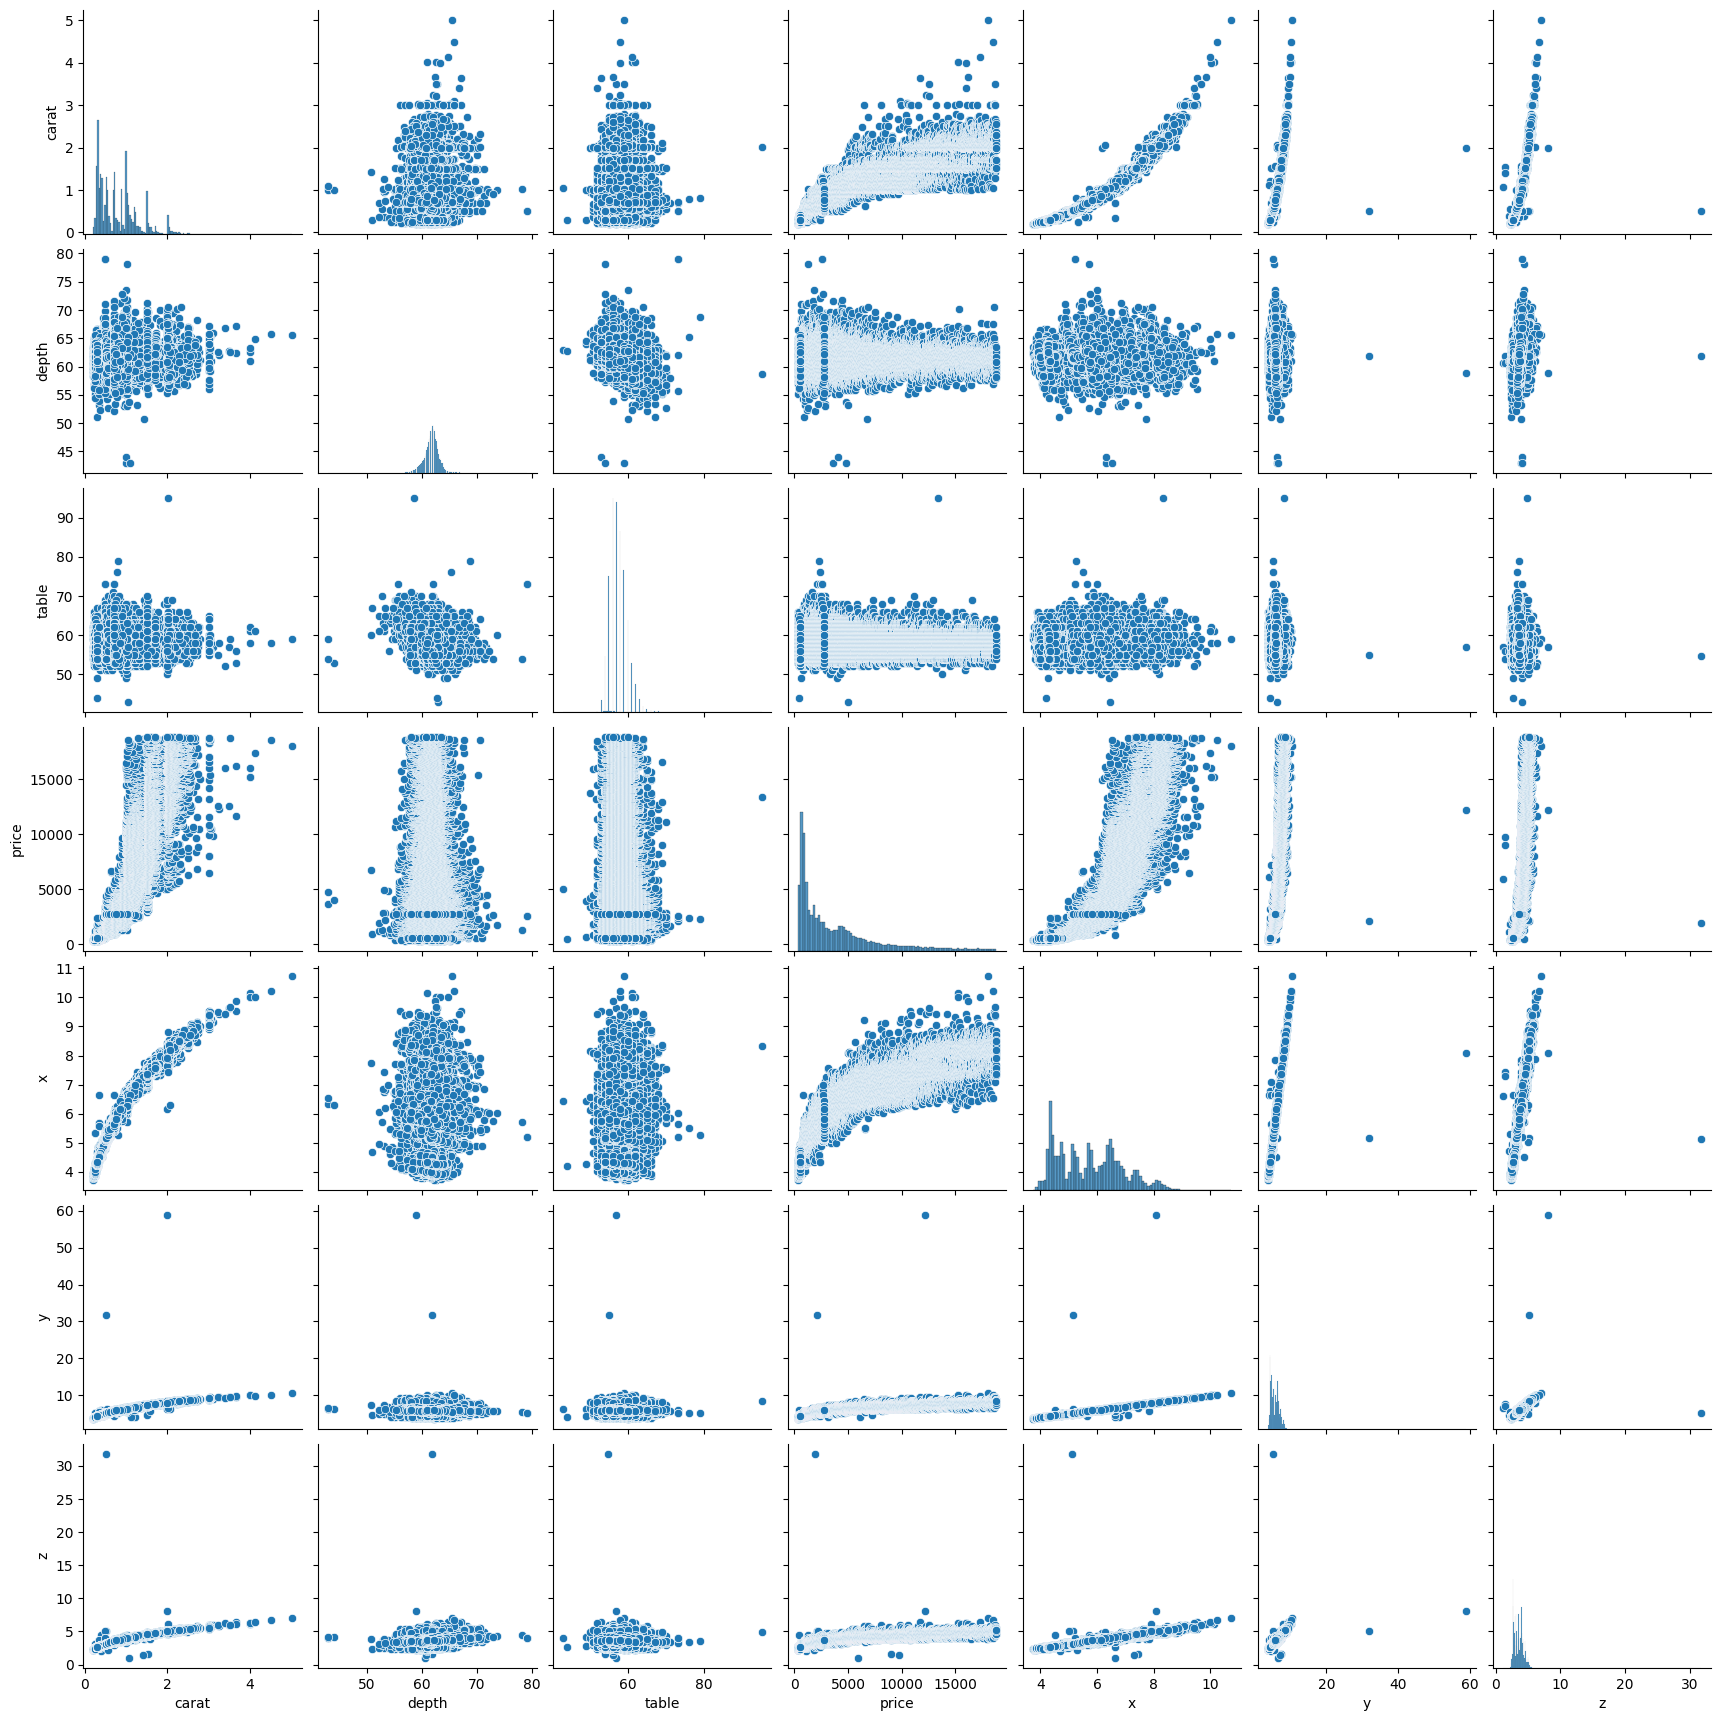

In [13]:
#Visualisation des relations entre variables
sns.pairplot(df)

**"y" and "z" have some dimensional outlies in our dataset that needs to be eliminated.**


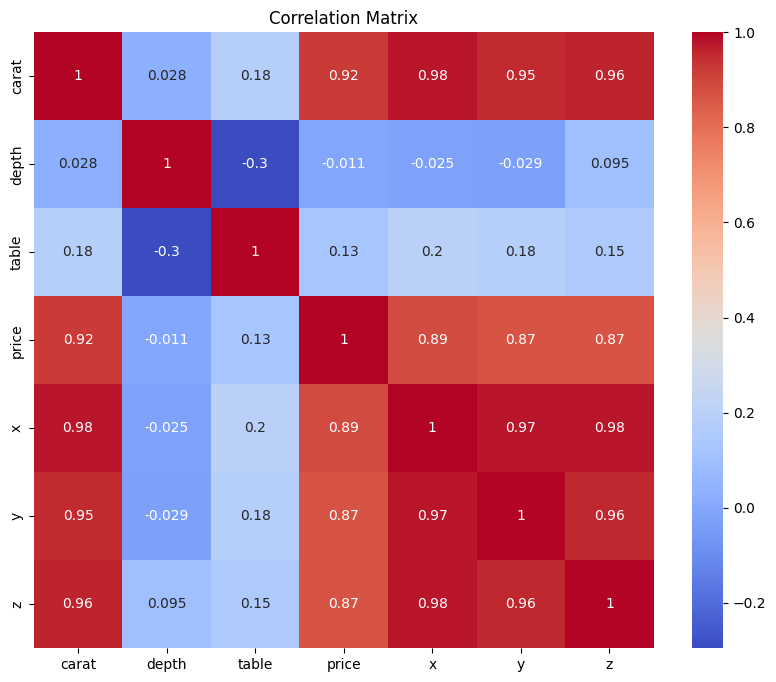

In [14]:
# Calculer la matrice de corrélation
correlation_matrix = df.corr(numeric_only=True)

# Ajuster la taille de la figure
plt.figure(figsize=(10, 8))

# Créer la heatmap avec annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Ajouter un titre
plt.title("Correlation Matrix")

# Afficher la heatmap
plt.show()

**Les dimensions et le nombre de carats présentent une corrélation élevée avec le prix**

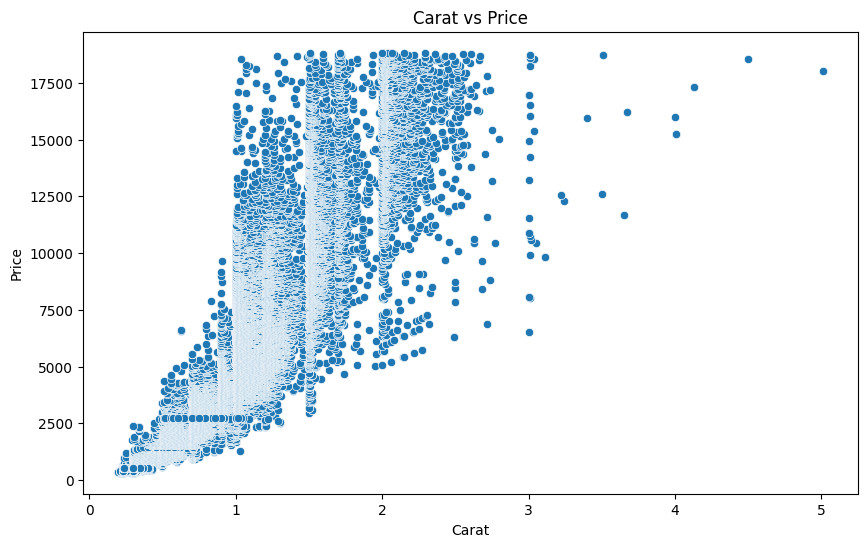

In [15]:
# graphique de dispersion pour observer la relation entre le carat et le prix
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', data=df)

# Adding titles to the graph
plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()


In [16]:
# la liste des variables catégorielles
s = (df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


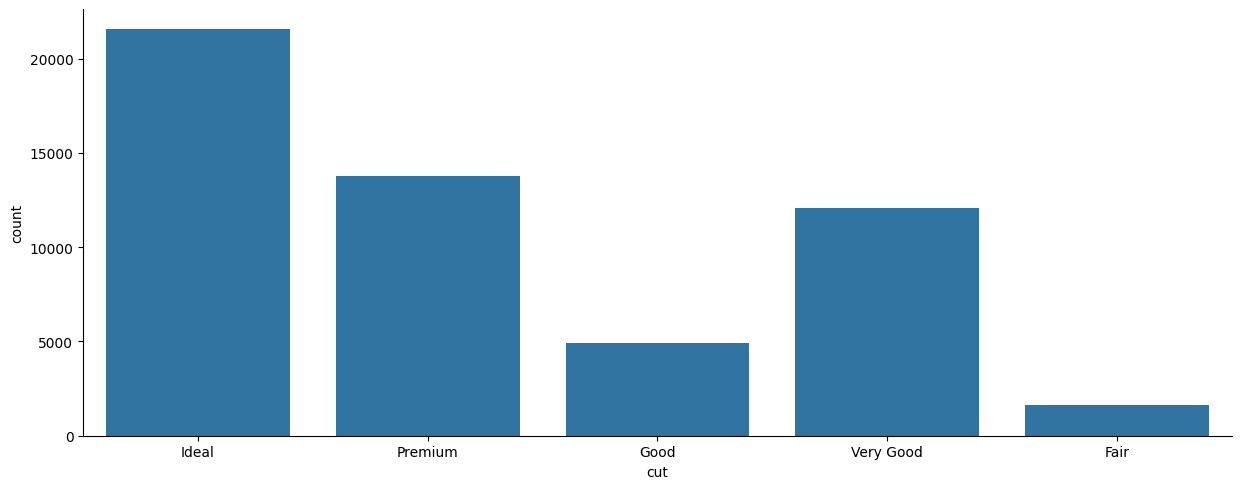

In [17]:
# la distribution de la variable 'cut' en comptant le nombre d'occurrences de chaque catégorie.
sns.catplot(x='cut', data=df , kind='count',aspect=2.5 )

<Axes: xlabel='cut', ylabel='price'>

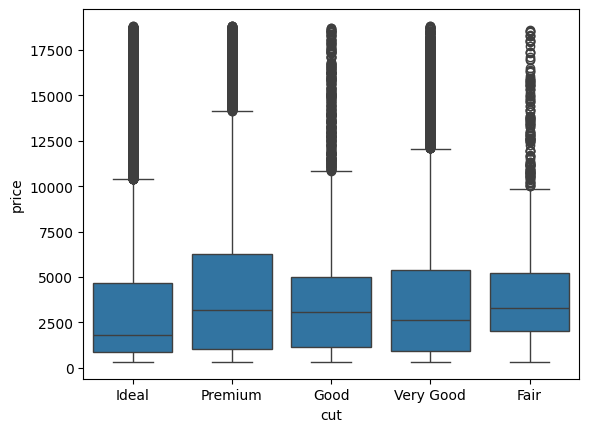

In [18]:
sns.boxplot(x='cut',y='price', data=df  )

<Axes: xlabel='color', ylabel='price'>

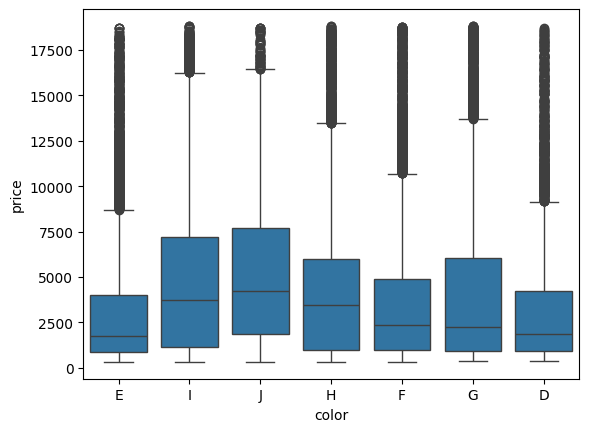

In [19]:
sns.boxplot(x='color', y='price', data=df )

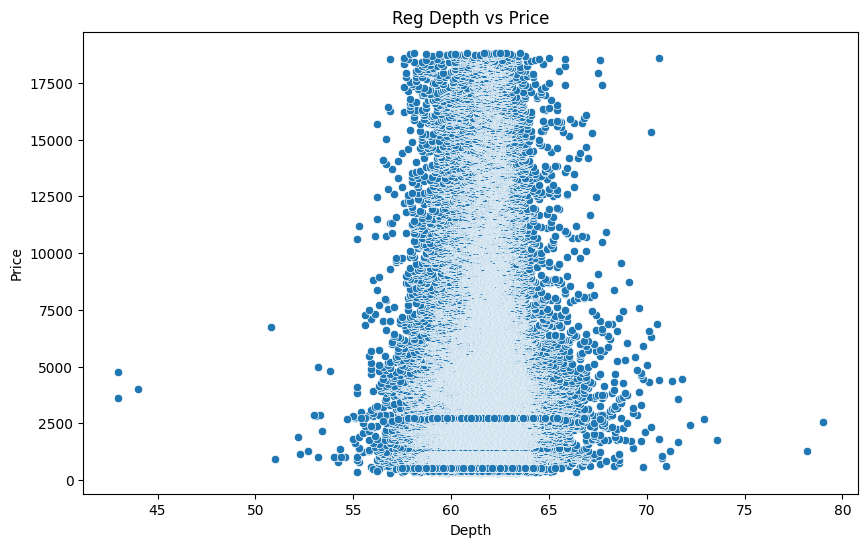

In [45]:
# histogramme pour analyser plus en détail la variable Depth
plt.figure(figsize=(10, 6))
sns.scatterplot(x='depth', y='price', data=df)
plt.title('Reg Depth vs Price')
plt.xlabel('Depth')
plt.ylabel('Price')
plt.show()

**D'après le graphique, on peut en déduire que le prix peut varier de manière significative pour une même profondeur.**

la variable depth est moins significative pour prédire le prix d'un diamant.

In [21]:
# Faire une copie pour éviter de modifier les données originales.
label_data = df.copy()

# Appliquer un encodeur d'étiquettes à chaque colonne contenant des données catégorielles.
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


<Axes: >

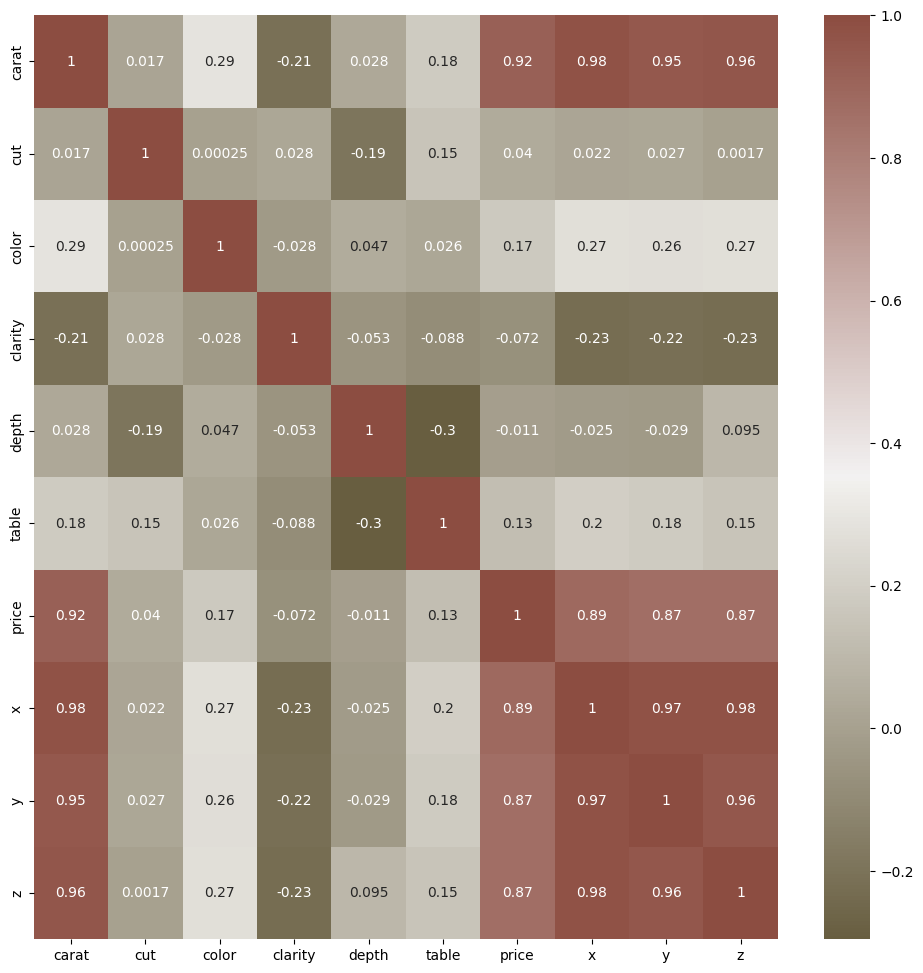

In [22]:
#matrice de correlation
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

**À noter:**

Les variables 'x', 'y' et 'z', ainsi que 'Carat' montrent une forte corrélation avec la colonne cible.

Les variables 'depth', 'cut' et 'table' montrent une faible corrélation. Nous pourrions envisager de les supprimer, mais nous allons les conserver.

**Construction du modèle**





In [23]:
# Attribuer les caractéristiques à X et la cible à y
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [24]:
print('X_train taille: ', X_train.shape)
print('X_test taille: ', X_test.shape)
print('y_train taille: ', y_train.shape)
print('y_test taille: ', y_test.shape)

X_train taille:  (40440, 9)
X_test taille:  (13480, 9)
y_train taille:  (40440,)
y_test taille:  (13480,)


In [36]:
# Créer et entraîner le modèle
model_Lr = LinearRegression()
model_Lr.fit(X_train, y_train)

# Prédictions
y_pred = model_Lr.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 1789111.41
R² Score: 0.89


In [35]:
# Créer et entraîner le modèle
model_Dt = DecisionTreeRegressor()
model_Dt.fit(X_train, y_train)

# Prédictions
y_pred = model_Dt.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 546903.04
R² Score: 0.97


In [34]:
# Créer et entraîner le modèle
model_Rf = RandomForestRegressor()
model_Rf.fit(X_train, y_train)

# Prédictions
y_pred = model_Rf.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 312657.52
R² Score: 0.98


**Le modèle RandomForest a été sélectionné en raison de son R² Score de 0,98.**

In [44]:
y_predict = model_Rf.predict(X_test)
y_predict

array([2236.96, 5651.53, 3777.83, ...,  514.84, 8822.08, 1066.55])

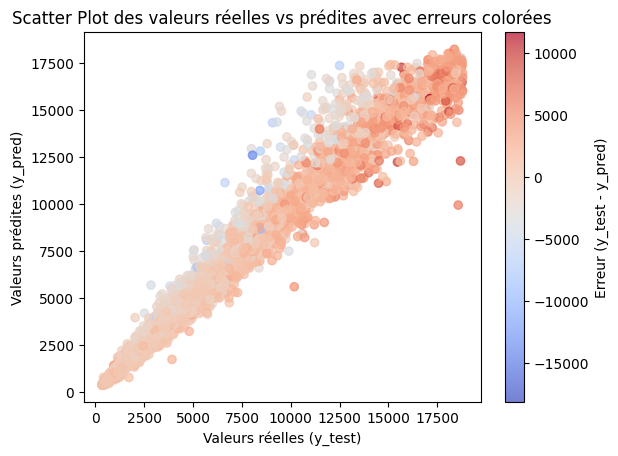

In [43]:
error = y_test - y_pred
plt.scatter(y_test,y_predict ,c=error, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Erreur (y_test - y_pred)')  # Afficher la barre de couleur
plt.xlabel('Valeurs réelles (y_test)')
plt.ylabel('Valeurs prédites (y_pred)')
plt.title('Scatter Plot des valeurs réelles vs prédites avec erreurs colorées')
plt.show()

Les points rouges indiquent des erreurs positives (valeurs prédites trop basses par rapport aux réelles).
Les points bleus indiquent des erreurs négatives (valeurs prédites trop élevées par rapport aux réelles).

In [38]:
# Enregistrer le modèle
import pickle
pickle.dump(model_Rf,open('model.pkl','wb'))